In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
import pandas as pd

In [105]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [106]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


1.) What is the distribution of age among heart failure patients in the dataset

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Coutn of the People')

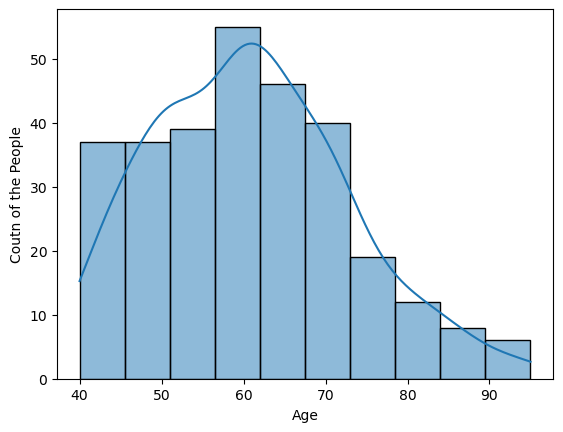

In [109]:
sns.histplot(df['age'],kde=True)
plt.xlabel('Age')
plt.ylabel('Coutn of the People')

 ´ 2.How does the death rate vary with age

C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\2940302240.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT'] == 1,'age'],label='Yes',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


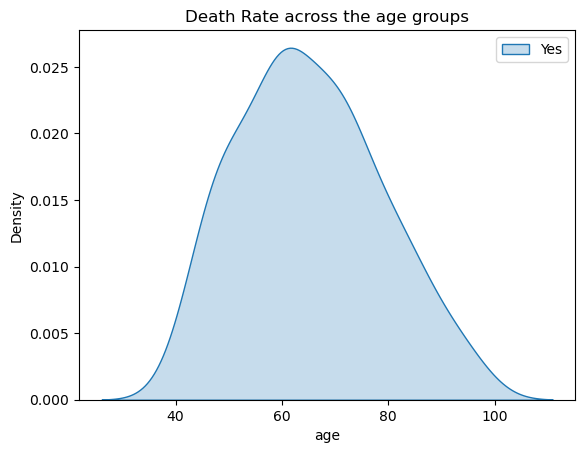

In [110]:

sns.kdeplot(df.loc[df['DEATH_EVENT'] == 1,'age'],label='Yes',shade = True)
plt.title('Death Rate across the age groups')
plt.legend()
plt.show()




It can be seen that people who are having from around 40 to 60 tend to have more hear attacks than the people who are having age 60 to 80

3´ What is the percentage of male and female patients in the dataset?

In [111]:
df['sex'].value_counts(normalize = True)

sex
1    0.648829
0    0.351171
Name: proportion, dtype: float64

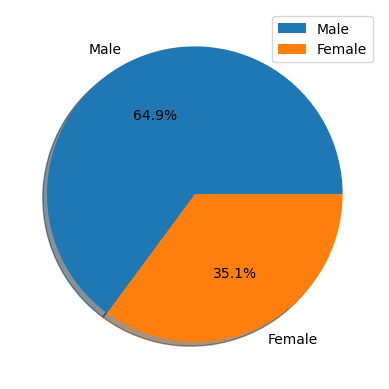

In [112]:
labels = ['Male','Female']
plt.pie(df['sex'].value_counts(),labels = labels,shadow=True,autopct='%.1f%%')
plt.legend()
plt.show()

The percentage of Male patients is 64.9% and the percentage of female patients is 35.1%

4. How does the platelet count vary among different age groups


<Axes: xlabel='age', ylabel='platelets'>

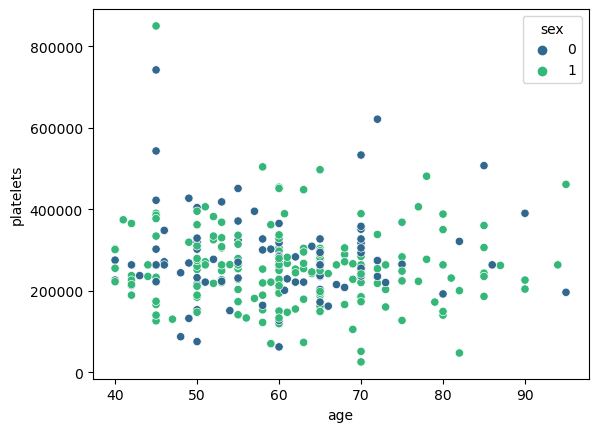

In [113]:
sns.scatterplot(x=df['age'],y=df['platelets'],palette= 'viridis',hue=df['sex'])

It can be seen from the scatterplot that the platlets count decreases as the age increases and the people ages between 40 to 60 are tend to have more platelets count.

5. Is there a correlation between creatinine and sodium levels in the blood<

In [114]:
df[['creatinine_phosphokinase','serum_creatinine','serum_sodium']]

,creatinine_phosphokinase,serum_creatinine,serum_sodium
0,582,1.9,130
1,7861,1.1,136
2,146,1.3,129
3,111,1.9,137
4,160,2.7,116
...,...,...,...
294,61,1.1,143
295,1820,1.2,139
296,2060,0.8,138
297,2413,1.4,140


In [115]:
df[['serum_creatinine','serum_sodium']].corr()

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


From the above it can be seen from the above that the serum creatinine and serum sodium levels are negatively correlated

In [116]:
df[['creatinine_phosphokinase','serum_sodium']].corr()

,creatinine_phosphokinase,serum_sodium
creatinine_phosphokinase,1.00000,0.05955
serum_sodium,0.05955,1.00000


From the above it can be seen that creatinine phosphoinase and serum sodium levels are postively correlated

6.How does the prevalence of high blood pressure differ between male and female patients<

In [117]:

plot_data = pd.crosstab(df['high_blood_pressure'], df['sex'])

plot_data


sex,0,1
high_blood_pressure,,
0,61,133
1,44,61


<Axes: xlabel='high_blood_pressure'>

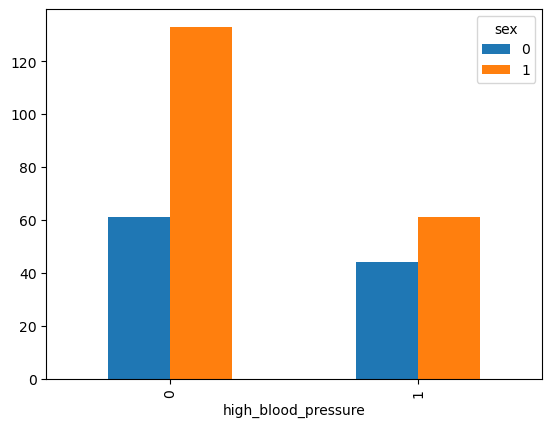

In [118]:
plot_data.plot(kind='bar')

The Male are tend to have more blood pressure than Female.

7. What is the relationship between smoking habits and the occurrence of heart failure<

In [119]:
df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [120]:

count_data = pd.crosstab(df['smoking'], df['DEATH_EVENT'])

count_data


DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


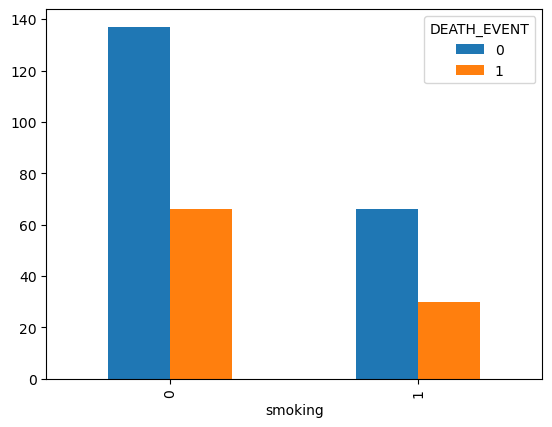

In [121]:
# Plotting a stacked bar plot
count_data.plot(kind='bar')

plt.show()

It can be seen that out of 203 people who are not smoking ,66 are have faced the Death event.
And those who are smoking out of 96 30 have faced the death event

8.) Are there any noticeable patterns in the distribution of death events across different age groups<

C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\3959502828.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT'] == 0,'age'],label = 'No',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\3959502828.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT'] == 1,'age'],label='Yes',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remo

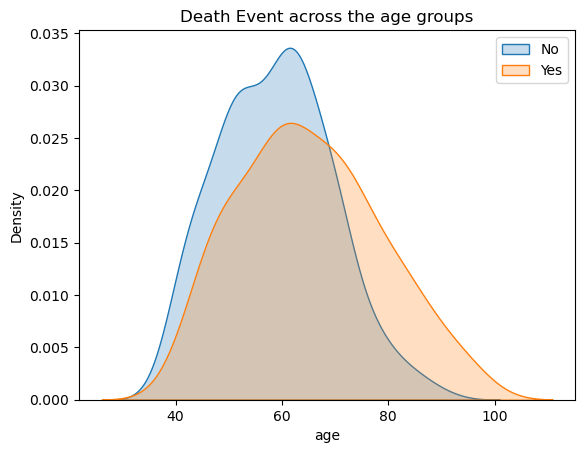

In [122]:
sns.kdeplot(df.loc[df['DEATH_EVENT'] == 0,'age'],label = 'No',shade = True)
sns.kdeplot(df.loc[df['DEATH_EVENT'] == 1,'age'],label='Yes',shade = True)
plt.title('Death Event across the age groups')
plt.legend()
plt.show()


It can be seen that  almost half of the people are having the death event and betweeb age of 40 to 60 it is even more.

9.) Is there any significant difference in ejection fraction between patients with and without diabetes<

C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\2777889242.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['diabetes'] == 0,'ejection_fraction'],label = 'No',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\2777889242.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['diabetes'] == 1,'ejection_fraction'],label='Yes',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depre

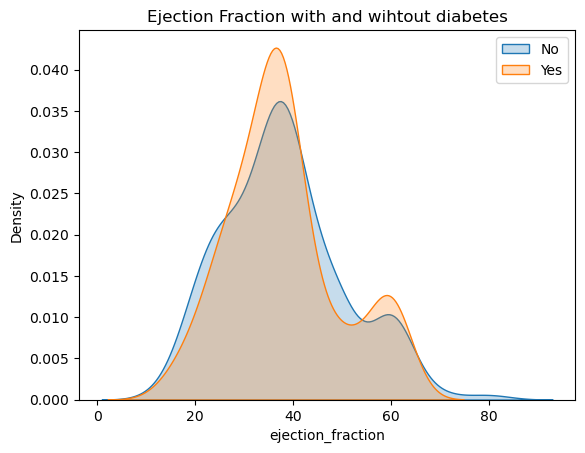

In [123]:
sns.kdeplot(df.loc[df['diabetes'] == 0,'ejection_fraction'],label = 'No',shade = True)
sns.kdeplot(df.loc[df['diabetes'] == 1,'ejection_fraction'],label='Yes',shade = True)
plt.title('Ejection Fraction with and wihtout diabetes')
plt.legend()
plt.show()

It can be seen that the one with diabetes has more ejection fraction than the one with no diabetes.

10.) How does the serum creatinine level vary between patients who survived and those who did not?

C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\1692354132.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT'] == 0,'serum_creatinine'],label = 'No',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yoshi\AppData\Local\Temp\ipykernel_9184\1692354132.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['DEATH_EVENT'] == 1,'serum_creatinine'],label='Yes',shade = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is d

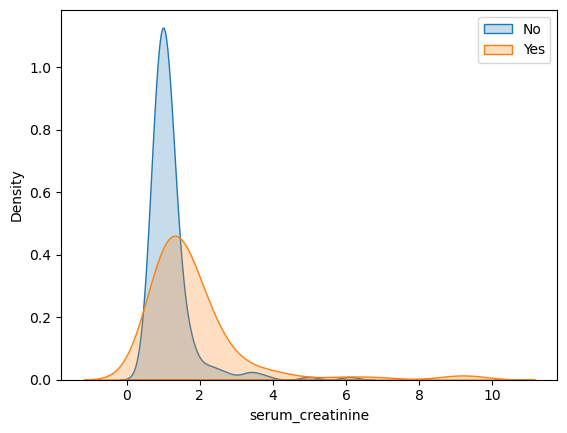

In [124]:
sns.kdeplot(df.loc[df['DEATH_EVENT'] == 0,'serum_creatinine'],label = 'No',shade = True)
sns.kdeplot(df.loc[df['DEATH_EVENT'] == 1,'serum_creatinine'],label='Yes',shade = True)
plt.legend()
plt.show()

The one with less serum creatinine levels are tend to have lesser deaths than the one with more serum creatanine levels.